# **Programming Assignment No.3**

---



## **Logistic Regression**

**Prepared by:**

Amadaor, Kathleen T.

Cabulagan, Karl C.

Ricafrente, John Harold

## **Importing Libraries for Data Preprocessing and Model Evaluationt**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


## **Mounting Google Drive in Colab**

In [64]:
from google.colab import drive
drive.mount('/content/drive')

wdbc_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PA3/wdbc.data', header=None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Assigning Column Names to the Dataset**

In [65]:

column_names = [
    'ID', 'Diagnosis',
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean',
    'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se',
    'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se',
    'Fractal_dimension_se',
    'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst',
    'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst',
    'Fractal_dimension_worst'
]


## **Data Cleaning and Label Encoding for the Dataset**

In [66]:
wdbc_df.columns = column_names
# Use wdbc_df for further operations
wdbc_df.dropna(inplace=True)
wdbc_df.drop(columns=['ID'], inplace=True)
wdbc_df["Diagnosis"] = wdbc_df["Diagnosis"].map({"M": 1, "B": 0})
print(wdbc_df)


     Diagnosis  Radius_mean  Texture_mean  Perimeter_mean  Area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
0            0.11840           0.27760         0.30010  

# **General Guidelines**



---



**1.) Split the samples into 70% Training and 30% Testing at random.**

**2.) Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and
logistic regression.**

**3.) Use the default penalty settings of Logistic Regression.**

In [47]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = wdbc_df.drop(columns=["Diagnosis"])  # Features
y = wdbc_df["Diagnosis"]  # Target

# Split into training and testing sets with a 70-30 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 398 samples
Testing set size: 171 samples


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Split the dataset into features (X) and target (y)
X = wdbc_df.drop(columns=["Diagnosis"])  # Features
y = wdbc_df["Diagnosis"]  # Target

# Split into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Build a pipeline with StandardScaler and LogisticRegression using default penalty settings
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("logreg", LogisticRegression(random_state=42, penalty='l2'))  # Default L2 regularization
])

**4.) After fitting the data, what is the model’s training and testing accuracy? Which features are most
important?**

In [61]:
# Training and testing accuracy
train_accuracy = pipeline.score(X_train, y_train)
test_accuracy = pipeline.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Feature importance
feature_importance = pipeline.named_steps["logreg"].coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": abs(feature_importance)
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance (All Features):")
print(importance_df)

Training Accuracy: 0.99
Testing Accuracy: 0.97

Feature Importance (All Features):
                    Feature  Importance
21            Texture_worst    1.384327
10                Radius_se    1.205130
28           Symmetry_worst    1.085744
13                  Area_se    0.912114
15           Compactness_se    0.904630
23               Area_worst    0.876082
7       Concave_points_mean    0.853924
20             Radius_worst    0.845014
26          Concavity_worst    0.832548
6            Concavity_mean    0.805938
12             Perimeter_se    0.778133
22          Perimeter_worst    0.711504
27     Concave_points_worst    0.686852
19     Fractal_dimension_se    0.512211
1              Texture_mean    0.493086
24         Smoothness_worst    0.459956
5          Compactness_mean    0.455857
3                 Area_mean    0.409814
17        Concave_points_se    0.407069
11               Texture_se    0.395840
4           Smoothness_mean    0.391005
18              Symmetry_se    0.3292

**Answer:**
The best Feature in accordance with the importance are:
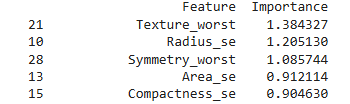


**5.) Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False
alarm rate.**

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171


Confusion Matrix:


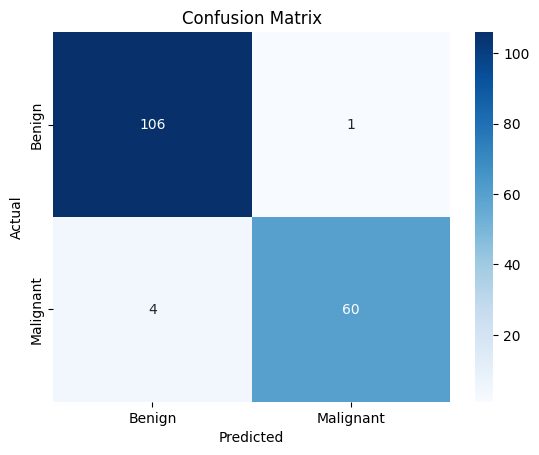

In [67]:

# Train the pipeline on the training set
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the pipeline
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**6.) Plot the ROC curve and report the AUC. For this item, make a result for both the training and
testing data, separately.**

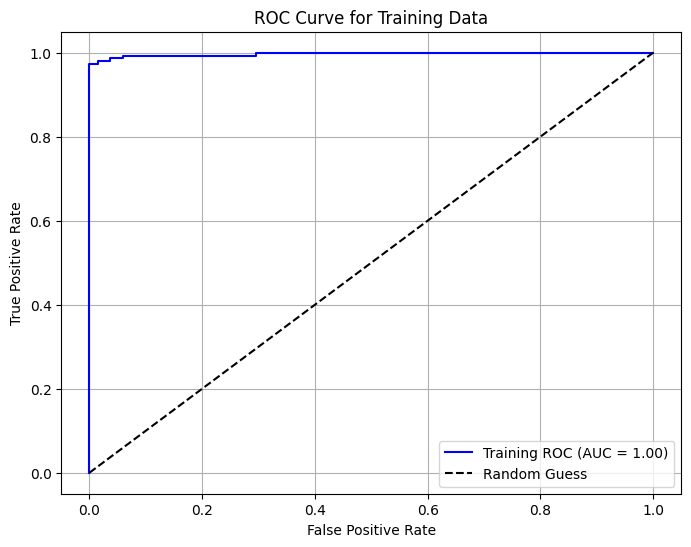

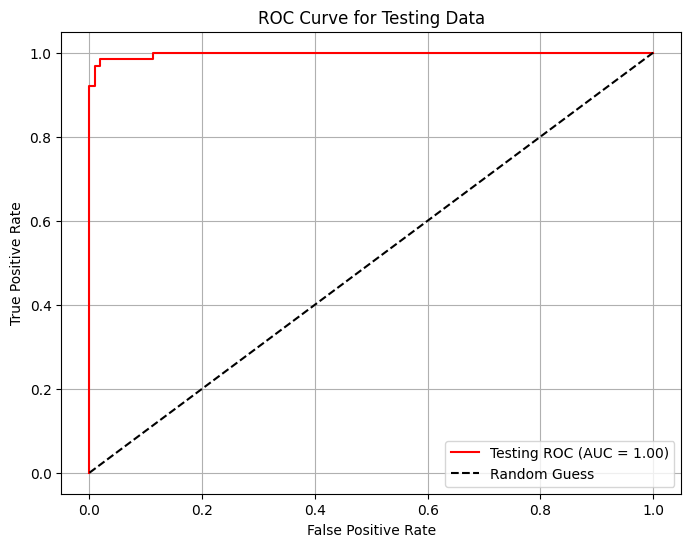

AUC for Training Data: 1.00
AUC for Testing Data: 1.00


In [68]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for training data
y_train_prob = pipeline.predict_proba(X_train)[:, 1]  # Probabilities for the positive class

# Predict probabilities for testing data
y_test_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate ROC curve for training data
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
roc_auc_train = roc_auc_score(y_train, y_train_prob)

# Calculate ROC curve for testing data
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
roc_auc_test = roc_auc_score(y_test, y_test_prob)

# Plot ROC curve for training data
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f"Training ROC (AUC = {roc_auc_train:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Plot ROC curve for testing data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='red', label=f"Testing ROC (AUC = {roc_auc_test:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Testing Data')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Output AUC scores
print(f"AUC for Training Data: {roc_auc_train:.2f}")
print(f"AUC for Testing Data: {roc_auc_test:.2f}")



# **Guide Question**


---

##**1. What steps are required to remove the "Sample code number" column?**


> Add blockquote


##**2. How can the "Class" values be converted into binary (0 and 1) form in Python?**


> Add blockquote


##**3. What is the importance of splitting the dataset into training and testing sets?**


> Add blockquote


##**4. Why is it necessary to use the stratify parameter in the train_test_split function?**


> Add blockquote


##**5. What is logistic regression, and why is it suitable for this dataset?**


> Add blockquote


## **6. How can the training and testing accuracy of the logistic regression model be calculated?**


> Add blockquote


##**7. Which features in the dataset are most influential in determining the tumor status, and how can their importance be assessed?**


> Add blockquote


##**8. How is a confusion matrix generated, and what does it represent?**


> Add blockquote


##**9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?**

##**10. Why are these metrics important for evaluating the performance of a classifier?**


> Add blockquote


##**11. What is an ROC curve, and how is it plotted for a logistic regression model?**


> Add blockquote


##**12. How is the AUC (Area Under the Curve) calculated, and what does it signify about the model's performance?**


> Add blockquote


##**13. How do the training and testing ROC curves compare, and what insights can be derived from this comparison?**


> Add blockquote


##**14. What challenges did you encounter during the preprocessing or model training phases, and how did you address them?**


> Add blockquote


##**15. If the model's performance is not satisfactory, what adjustments could be made to improve it?**


> Add blockquote



